In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# error pandas io data > pandas_datareader

from pandas.io.data import DataReader

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pandas-dev/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

In [7]:
from pandas_datareader import data

In [8]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [11]:
end = datetime.now()

In [12]:
start = datetime(end.year-1, end.month, end.day)

In [13]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [15]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-26,103.910004,105.300003,103.910004,104.349998,56016200,102.189682
2016-04-27,96.000000,98.709999,95.680000,97.820000,114602100,95.794871
2016-04-28,97.610001,97.879997,94.250000,94.830002,82242700,92.866774
2016-04-29,93.989998,94.720001,92.510002,93.739998,68531500,91.799336
2016-05-02,93.970001,94.080002,92.400002,93.639999,48160100,91.701408


In [16]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,114.320717,115.157888,113.664103,114.485458,3.306333e+07,113.670916
std,15.375691,15.350228,15.430769,15.429175,1.580099e+07,15.929551
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,101.325001,103.119999,101.134998,101.680001,2.374645e+07,100.181220
50%,111.949997,113.050003,111.400002,112.120003,2.852880e+07,111.317377
75%,120.209999,120.654999,119.750000,120.040001,3.630755e+07,119.521805
max,144.289993,145.460007,143.809998,144.770004,1.146021e+08,144.770004


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-04-26 to 2017-04-24
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


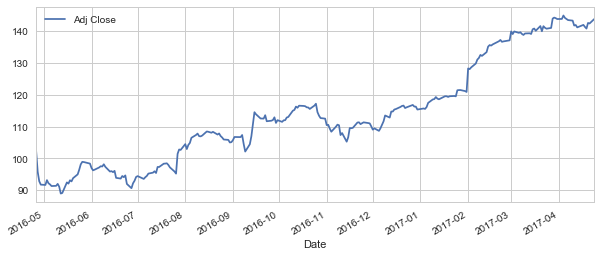

In [25]:
AAPL['Adj Close'].plot(legend = True, kind='line', figsize=(10,4))

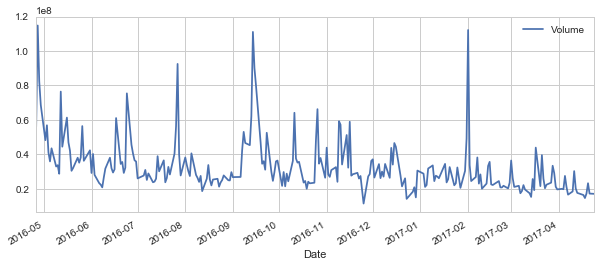

In [28]:
AAPL['Volume'].plot(legend=True,kind='line',figsize=(10,4))

url = 'http://www.investopedia.com/terms/m/movingaverage.asp'

url = 'http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp'

In [33]:
# Moving average

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)


C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\yang\Anaconda3\envs\python_2_7\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


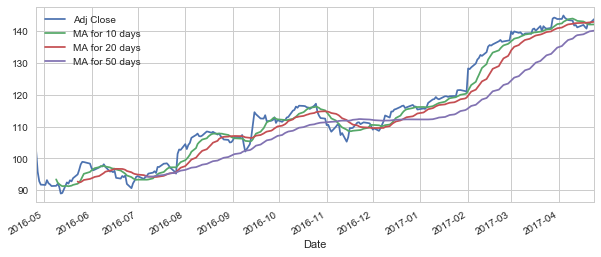

In [36]:
AAPL[['Adj Close', 'MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

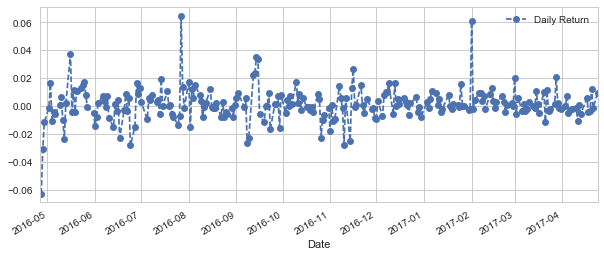

In [38]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle='--',marker='o')

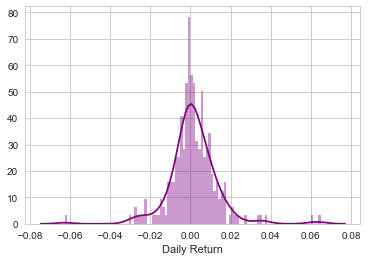

In [39]:
# seaborn 사용해서 plot

sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

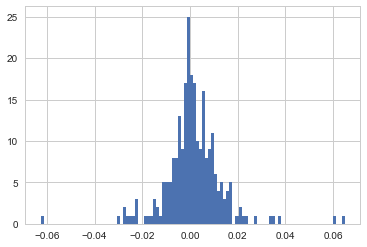

In [41]:
# simple 하게 이방법도 있음

AAPL['Daily Return'].hist(bins = 100)

In [46]:
closing_df = data.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [47]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-26,102.189682,616.880005,708.140015,50.121779
2016-04-27,95.794871,606.570007,705.840027,49.634592
2016-04-28,92.866774,602.000000,691.020020,48.621246
2016-04-29,91.799336,659.590027,693.010010,48.592012
2016-05-02,91.701408,683.849976,698.210022,49.313050


In [48]:
tech_rets = closing_df.pct_change()

In [49]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-26,NaN,NaN,NaN,NaN
2016-04-27,-0.062578,-0.016713,-0.003248,-0.009720
2016-04-28,-0.030566,-0.007534,-0.020996,-0.020416
2016-04-29,-0.011494,0.095664,0.002880,-0.000601
2016-05-02,-0.001067,0.036780,0.007504,0.014839


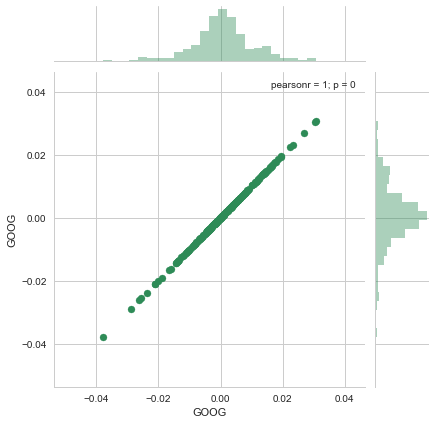

In [50]:
sns.jointplot('GOOG','GOOG',tech_rets, kind = 'scatter', color = 'seagreen')

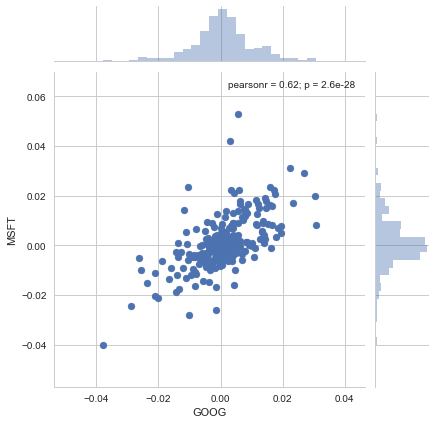

In [52]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter')

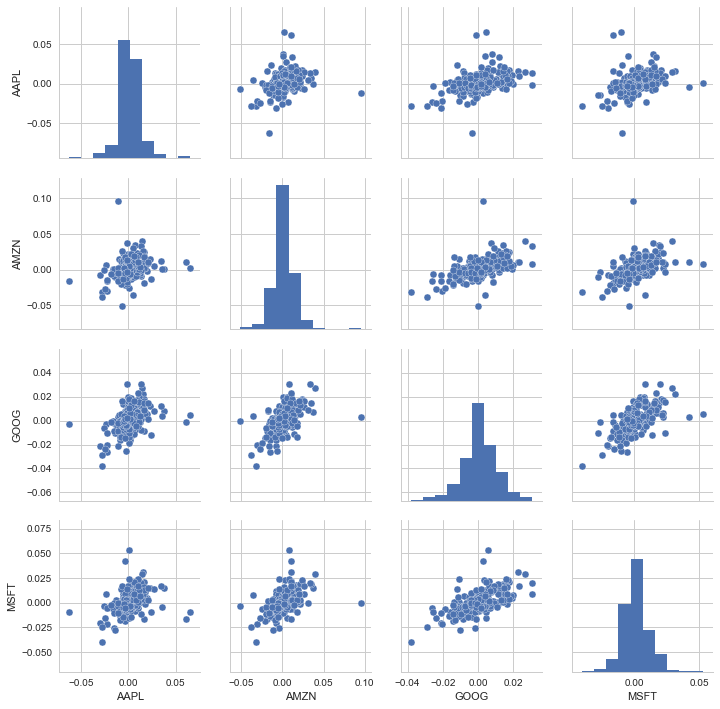

In [57]:
# pairplot : correlation 한번에 다 보는 것

sns.pairplot(data=tech_rets.dropna())

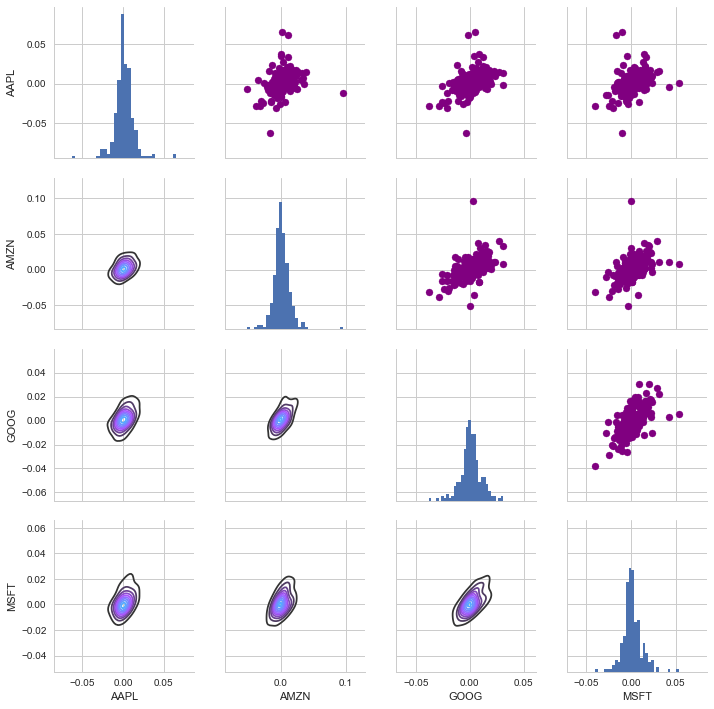

In [59]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

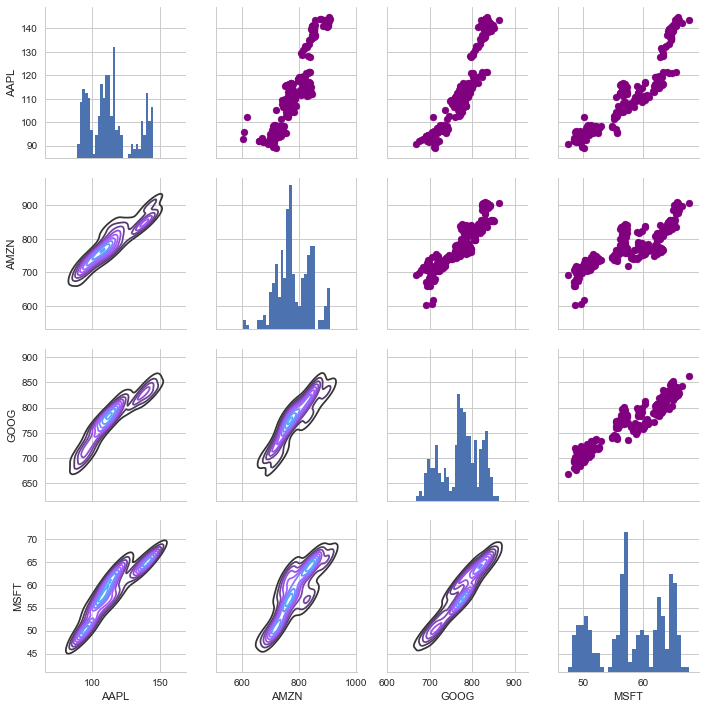

In [60]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

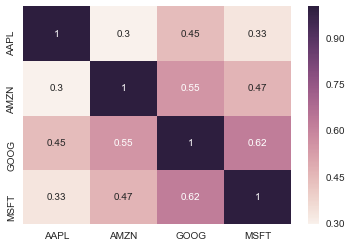

In [74]:
# error
# corr plot deprecated
# sns.corrplot(closing_df, annot=True)

sns.heatmap(data=tech_rets.corr(), annot=True)


In [75]:
rets = tech_rets.dropna()

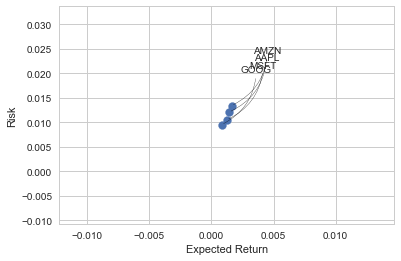

In [77]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [78]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-04-27,-0.062578,-0.016713,-0.003248,-0.009720
2016-04-28,-0.030566,-0.007534,-0.020996,-0.020416
2016-04-29,-0.011494,0.095664,0.002880,-0.000601
2016-05-02,-0.001067,0.036780,0.007504,0.014839
2016-05-03,0.016446,-0.018323,-0.008379,-0.016400


In [79]:
rets['AAPL'].quantile(0.05)

-0.01532761030154051

In [80]:
days = 365

dt = 1/days

mu =rets.mean()['GOOG']

sigma = rets.std['GOOG']

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [84]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale =  sigmma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+(Price[x-1]*(drift[x]+shock[x]))
    return price

In [85]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-26,725.419983,725.765991,703.026001,708.140015,2744600,708.140015
2016-04-27,707.289978,708.979980,692.364990,705.840027,3098600,705.840027
2016-04-28,708.260010,714.169983,689.549988,691.020020,2867300,691.020020
2016-04-29,690.700012,697.619995,689.000000,693.010010,2487700,693.010010
2016-05-02,697.630005,700.640015,691.000000,698.210022,1645300,698.210022


In [86]:
start_price = 725.41

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel('Days')
plt.ylabel('Price')

NameError: name 'sigma' is not defined